In [1]:
#importing necessary modules
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
import seaborn as sns
import pickle
from tqdm import tqdm
import itertools

#directory path for notebook
unique_user_path_notebook = 'C:/Users/yuyu2/Desktop/cmeAnalysis_Pipeline/20210406_cmeAnalysisPostProcessingPythonScripts'
sys.path.append(unique_user_path_notebook) # add custom Python scripts to the local pathimport display_tracks
import display_tracks
import return_track_attributes
from generate_index_dictionary import return_index_dictionary
index_dictionary = return_index_dictionary()

In [2]:
#defining paths for loading processed track data
p20_exp200=display_tracks.load_tracks('E:/RingTIRFoptimize/20p_200exp/20210516/cell1_2s/Ch1/Tracking/ProcessedTracks.mat')


In [3]:
len(p20_exp200)

1606

In [20]:
display_tracks.remove_tracks_by_criteria?

Signature:
display_tracks.remove_tracks_by_criteria(
    tracks,
    minimum_lifetime=0,
    maximum_lifetime=inf,
    track_category=[1, 2, 3, 4, 5, 6, 7, 8],
    ch_min_int_threshold=[-inf],
    keep_all=False,
    only_ccps=False,
    constraints_overlap_ccps=False,
)
Docstring: <no docstring>
File:      c:\users\yuyu2\desktop\cmeanalysis_pipeline\20210406_cmeanalysispostprocessingpythonscripts\display_tracks.py
Type:      function


In [5]:
#Loading only valid tracks
valid_p20_exp200 = display_tracks.remove_tracks_by_criteria(p20_exp200, track_category = [1])

The number of tracks returned: 520



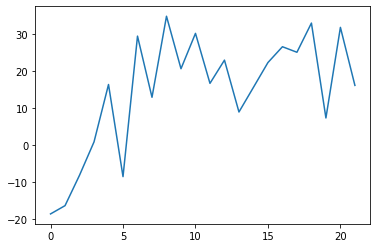

In [8]:
track_to_plot = 8
plt.plot(return_track_attributes.return_track_amplitude_one_channel(valid_p20_exp200, track_to_plot, 1))

In [29]:
#Filtering tracks by number of significant detections in the second channel
ap2_channel = 0
dyn2_channel = 1
nef_channel = 2

consecutive_dyn2_count = []
min_dyn2_detection = 5
min_nef_detection = 0
pval_cutoff_dyn2 = .01
pval_cutoff_nef = .01
tracks_to_filter = valid_tracks_14h
filtered_tracks = []
filtered_index = []

min_dyn2_pvals = []

for i in range(len(tracks_to_filter)):
    dyn2_pval = tracks_to_filter[i][index_dictionary['index_pval_Ar']][dyn2_channel]
#     for value in dyn2_pval:
#         if value < 0.01:
#             dyn2_pvals.append(value)
    min_dyn2_pvals.append(np.log(np.min(dyn2_pval)))
    nef_pval = tracks_to_filter[i][index_dictionary['index_pval_Ar']][nef_channel]
    significant_pval_indices_dyn2 = [1 if pval < pval_cutoff_dyn2 else 0 for pval in dyn2_pval]
    repeated_indices_dyn2 = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices_dyn2)]
    max_detection_dyn2 = 0
    for itm in repeated_indices_dyn2:
        if itm[0] == 1:
            if itm[1]>max_detection_dyn2:
                max_detection_dyn2=itm[1]
    consecutive_dyn2_count.append(max_detection_dyn2)
    significant_pval_indices_nef = [1 if pval < pval_cutoff_nef else 0 for pval in nef_pval]
    repeated_indices_nef = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices_nef)]
    max_detection_nef = 0
    for itm in repeated_indices_nef:
        if itm[0] == 1:
            if itm[1]>max_detection_nef:
                max_detection_nef=itm[1]
    if max_detection_dyn2 >= min_dyn2_detection & max_detection_nef >= min_nef_detection:
        filtered_tracks.append(tracks_to_filter[i])
        filtered_index.append(i)
#     print(len(dyn2_pval))
#     print(dyn2_pval)
        

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00,
        4.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        1.0000e+01, 4.0000e+00, 4.0000e+00, 6.0000e+00, 9.0000e+00,
        8.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00, 7.0000e+00,
        9.0000e+00, 9.0000e+00, 7.0000e+00, 8.0000e+00, 5.0000e+00,
        1.1000e+01, 8.0000e+00, 1.4000e+01, 8.00

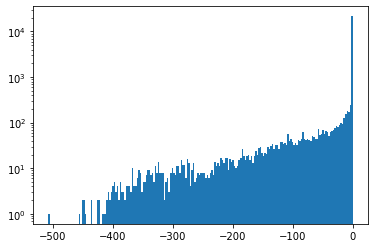

In [58]:
plt.hist(min_dyn2_pvals, bins = 200, log = True)
#plt.xlim(0,0.01)
#plt.xscale('log')

In [49]:
#determining the p-value cutoff via 1d-parameter sweep of pvalue
test_pval_range = range(0,500)
dyn2_channel = 1

consecutive_dyn2_count = []
min_dyn2_detection = 2
pval_cutoff_dyn2 = .01
tracks_to_filter = valid_tracks_14h
track_size = []

for test_pval in test_pval_range:
    count = 0
    #print(10**float(-1*test_pval))
    for i in range(len(tracks_to_filter)):
        dyn2_pval = tracks_to_filter[i][index_dictionary['index_pval_Ar']][dyn2_channel]
        significant_pval_indices_dyn2 = [1 if pval < 10**float(-1*test_pval) else 0 for pval in dyn2_pval]
        repeated_indices_dyn2 = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices_dyn2)]
        max_detection_dyn2 = 0
        for itm in repeated_indices_dyn2:
            if itm[0] == 1:
                if itm[1]>max_detection_dyn2:
                    max_detection_dyn2=itm[1]
        consecutive_dyn2_count.append(max_detection_dyn2)
        if max_detection_dyn2 >= min_dyn2_detection:
            count += 1
    track_size.append(count)
        

(0.0, 500.0)

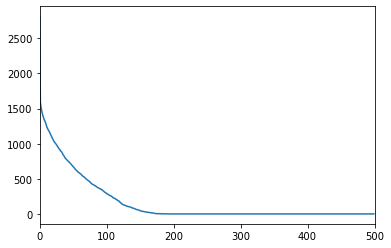

In [50]:
plt.plot(test_pval_range, track_size)
plt.xlim(0,500)
#plt.ylim(0, 10)

In [51]:
#determining the p-value cutoff via 1d-parameter sweep of pvalue
test_pval = .001
dyn2_channel = 1

consecutive_dyn2_count = []
min_dyn2_detection = 2
pval_cutoff_dyn2 = .01
tracks_to_filter = valid_tracks_14h
track_size = []

test_consecutive_window = range(1,15)

for consecutive_window in test_consecutive_window:
    count = 0
    #print(10**float(-1*test_pval))
    for i in range(len(tracks_to_filter)):
        dyn2_pval = tracks_to_filter[i][index_dictionary['index_pval_Ar']][dyn2_channel]
        significant_pval_indices_dyn2 = [1 if pval < test_pval else 0 for pval in dyn2_pval]
        repeated_indices_dyn2 = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices_dyn2)]
        max_detection_dyn2 = 0
        for itm in repeated_indices_dyn2:
            if itm[0] == 1:
                if itm[1]>max_detection_dyn2:
                    max_detection_dyn2=itm[1]
        consecutive_dyn2_count.append(max_detection_dyn2)
        if max_detection_dyn2 >= consecutive_window:
            count += 1
    track_size.append(count)
        

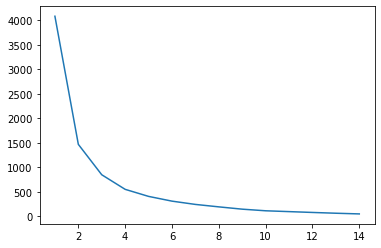

In [53]:
plt.plot(test_consecutive_window,track_size)

In [56]:
#determining the p-value cutoff via 1d-parameter sweep of pvalue
test_pval_range = range(0,500)
dyn2_channel = 1

consecutive_dyn2_count = []
min_dyn2_detection = 2
pval_cutoff_dyn2 = .01
tracks_to_filter = valid_tracks_14h
track_size = []

for test_pval in test_pval_range:
    count = 0
    for i in range(len(tracks_to_filter)):
        dyn2_pval = tracks_to_filter[i][index_dictionary['index_pval_Ar']][dyn2_channel]
        count += len(np.where(dyn2_pval<10**float(-1*test_pval))[0])
    track_size.append(count)
        

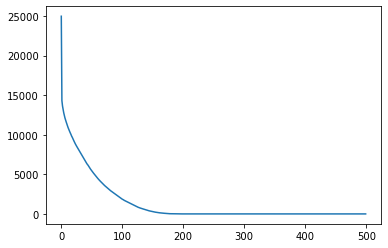

In [57]:
plt.plot(test_pval_range, track_size)


In [ ]:
#Fitting cohorts

In [10]:
display_tracks.fit_cohorts?

Signature:
display_tracks.fit_cohorts(
    tracks,
    class_indices,
    figsize,
    plot_shape,
    num_stds=0.25,
    cohorts=[[0, 20], [21, 40], [41, 60], [61, 80], [81, 100], [101, 120], [121, 140], [141, 160], [161, 180], [181, 200], [201, 220], [221, 240]],
    filename='',
    alignment='interpolate',
)
Docstring:
Display lifetime-binned cohorts of tracks separated by different class labels. 
Tracks in each cohort are interpolated to the length of the ceiling of the cohort.

Args:
    tracks (ndarray): numpy array of cmeAnalysis' ProcessedTracks.mat 
    class_indices (list of lists): each internal list contains indices for tracks in a designated class
    figsize (tuple): figure size for all subplots
    plot_shape (tuple): size of each subplot
    num_stds (float, optional): number of standard deviations of intensity for plotting intensity traces
    cohorts (list of lists, optional): each internal list contains the upper and lower bounds of lifetimes for each cohort
    fil

In [13]:
#getting channel amplitudes for generating three color cohort plots
import return_track_attributes
channel_amplitudes = []
for i in range(len(valid_tracks_14h)):
    ch0 = return_track_attributes.return_track_amplitude_no_buffer_channel(valid_tracks_14h, i, 0)
    ch1 = return_track_attributes.return_track_amplitude_no_buffer_channel(valid_tracks_14h, i, 1)
    ch2 = return_track_attributes.return_track_amplitude_no_buffer_channel(valid_tracks_14h, i, 2)
    channel_amplitudes.append([ch0, ch1, ch2])

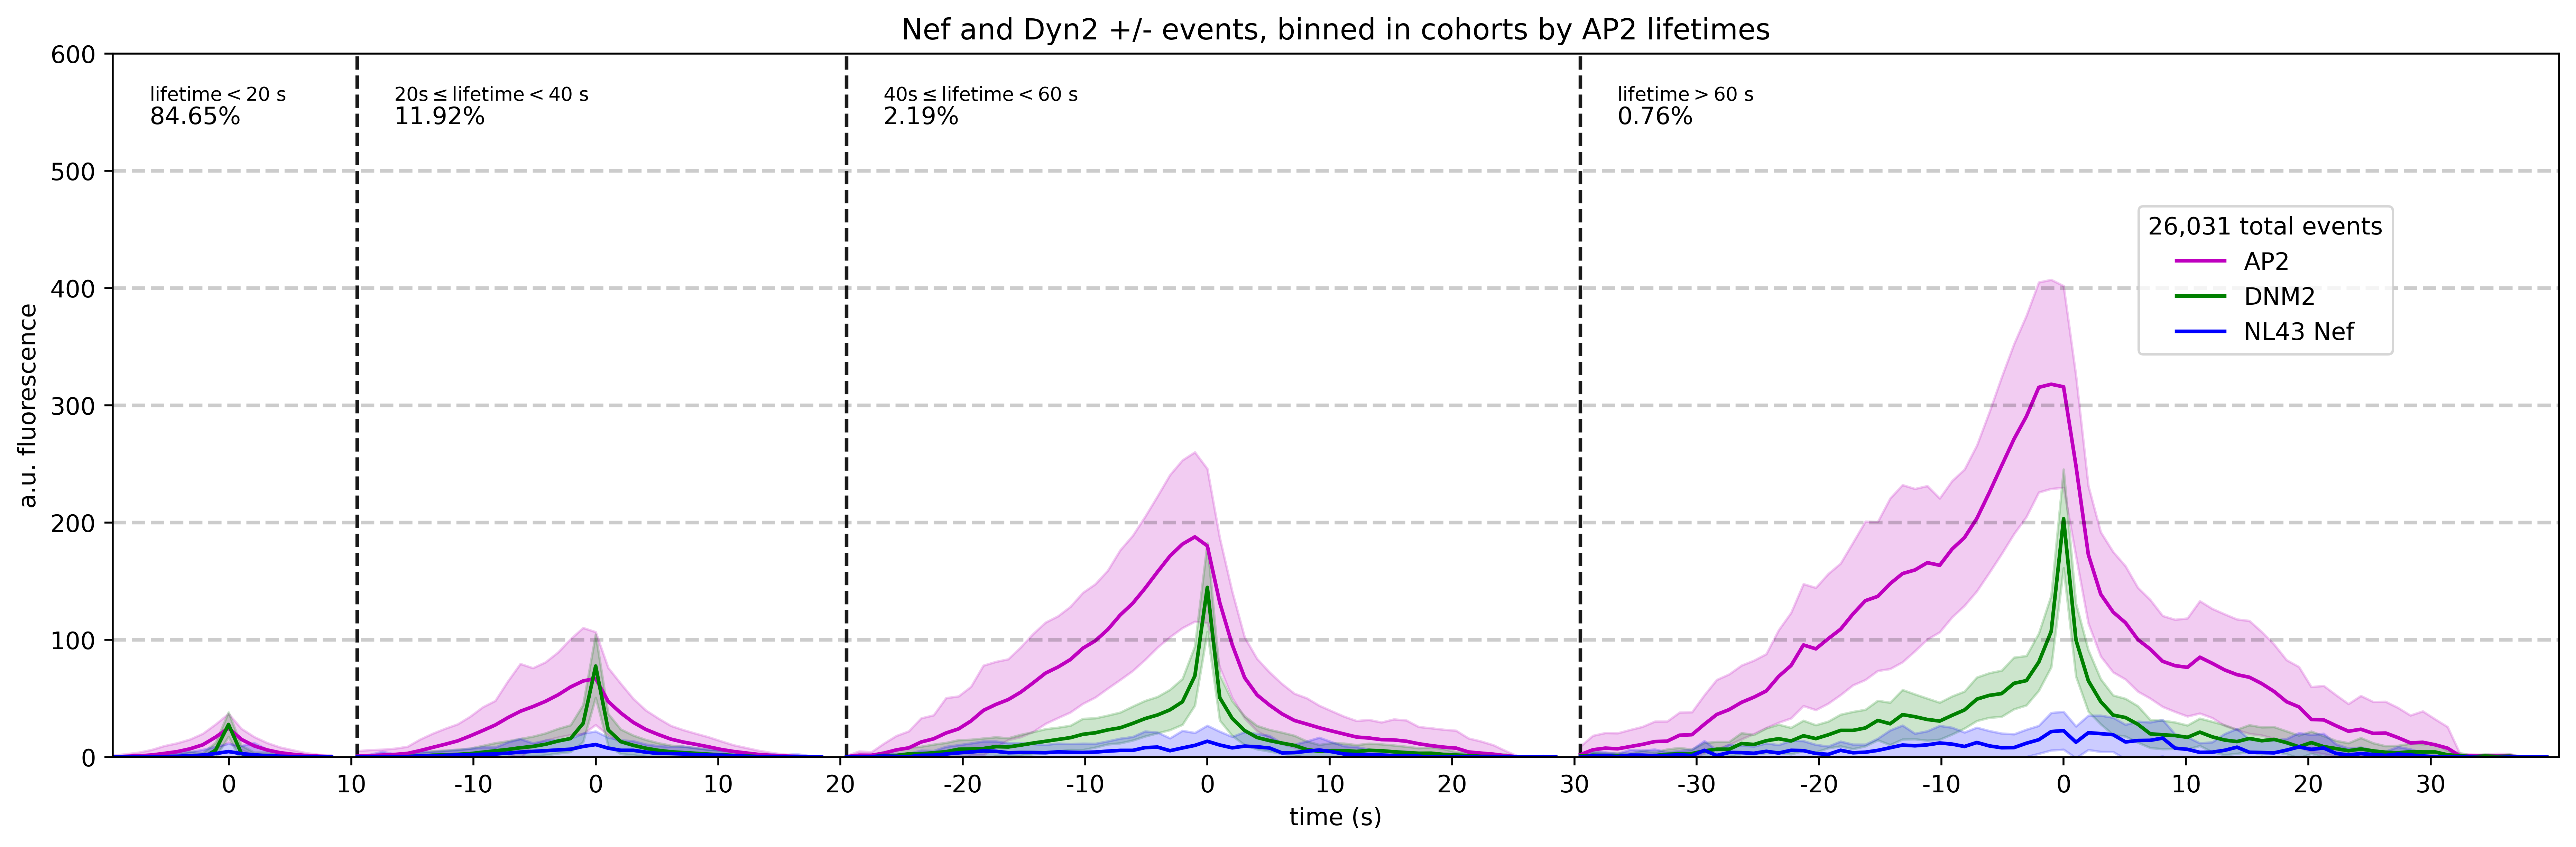

In [17]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, dpi=500, figsize=(15,5))
# axes_separation = axes.twinx()
cohorts = [[0,20],[20,40],[40,60],[60,80]]
offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes],
                                                                         channel_amplitudes,
                                                                         1,
                                                                         cohorts,
                                                                         [0, 1, 2],
                                                                         [],
                                                                         ['AP2', 'DNM2', 'NL43 Nef'],
                                                                         ['m', 'g', 'b'],framerate = 2)
lines_0, labels_0 = axes.get_legend_handles_labels()
axes.legend(lines_0, labels_0,
            loc='upper center',
            bbox_to_anchor=(0.88, 0.8),
            title="{:,}".format(len(channel_amplitudes)) + ' total events')
y_lines = np.arange(0,600,100)
for i in range(1,len(y_lines)):
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
text_horizontal_shifts = 3
text_percentage_y = 540
text_bounds_y = 560
for i in range(len(cohorts)):
    if i==0:
        axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
    elif i==len(cohorts)-1:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
    else:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]
for i in range(len(max_dnm2_cohort_indices)):
    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    for j in range(num_ticks_before):
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    for j in range(num_ticks_after):
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)
axes.set_xlabel('time (s)')
axes.set_ylabel('a.u. fluorescence')
axes.set_title('Nef and Dyn2 +/- events, binned in cohorts by AP2 lifetimes')
axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])
axes.set_ylim([0,600])
# axes_separation.set_ylim([0,.3])
plt.tight_layout()
